# <center> Histogram of Images

## Importing all necessary libraries 
<b> We also define the function for displaying image here

In [1]:
import numpy as np
import cv2
import os
def image_show_multiple(window_name,image):
    for i,item in enumerate(window_name):
        cv2.imshow(window_name[i],image[i])
    cv2.waitKey()
    cv2.destroyAllWindows()

## Histogram of an image

In [2]:
image_path=os.path.join('images','Dreaming_about_a_horse.jpg' )#coloured image
image_BGR=cv2.imread(image_path)
image_gray=cv2.imread(image_path,0)

In [3]:
image_BGR.shape, image_gray.shape

((450, 600, 3), (450, 600))

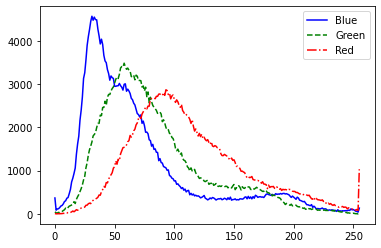

In [4]:
import matplotlib.pyplot as plt
color1=['b-','g--','r-.']
for i in range(3):
    histogram=cv2.calcHist([image_BGR], channels=[i], mask=None, histSize=[256], ranges=[0,256])
    plt.plot(histogram,color1[i])
plt.legend(['Blue','Green','Red'])

<b> It can be observed that the blue channel has lower values and red channel has higher intensity values.

Text(0.5, 1.0, 'Gray image histogram')

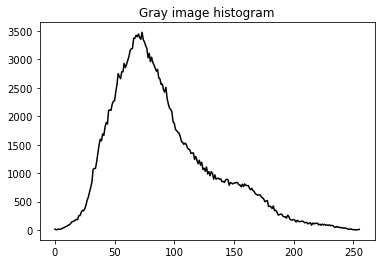

In [5]:
histogram=cv2.calcHist([image_gray], channels=[0], mask=None, histSize=[256], ranges=[0,256])
plt.plot(histogram,'k',)
plt.title('Gray image histogram')

<b> The histogram values for a blue image

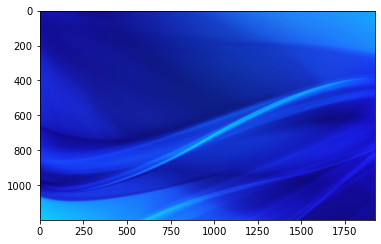

In [6]:
image_BGR1=cv2.imread(os.path.join('images','blue.jpg'))
plt.imshow(cv2.cvtColor(image_BGR1,cv2.COLOR_BGR2RGB)) #plt.imshow reads the channels as RGB not BGR. So conversion is required.

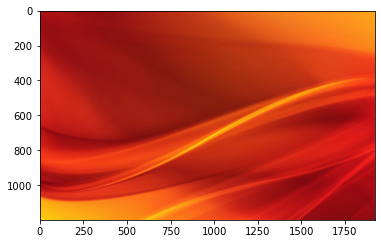

In [7]:
plt.imshow(image_BGR1) #Without Conversion

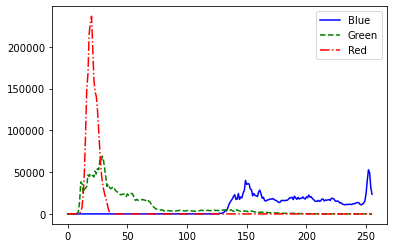

In [8]:
color1=['b-','g--','r-.']
for i in range(3):
    histogram=cv2.calcHist([image_BGR1], channels=[i], mask=None, histSize=[256], ranges=[0,256])
    plt.plot(histogram,color1[i])
plt.legend(['Blue','Green','Red'])

## Masked Histogram

<b> We can find the color histogram for only a particular region of interest (ROI) of the image by using mask.<br> 
    
* Lets find a mask based on the gray scale values within range 150 to 250. The pixels within this range will be 255 (white) and outside this range will be 0 (black)

In [9]:
image_path=os.path.join('images','Dreaming_about_a_horse.jpg' )#coloured image
image_gray=cv2.imread(image_path,0) #gray image
mask = cv2.inRange(image_gray, 150, 250)

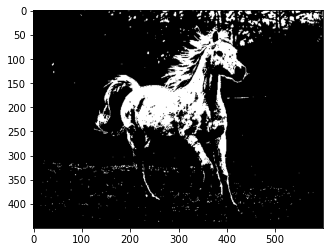

In [10]:
plt.imshow(mask,cmap='gray')

# Finding Mask using interactive widgets

In [11]:
# grayscale
import ipywidgets as widgets
from ipywidgets import interact, interact_manual
def display_mask(L,H): 
    image_path=os.path.join('images','Dreaming_about_a_horse.jpg') #coloured image
    image=cv2.imread(image_path,0) 
    mask = cv2.inRange(image, L,H)
    plt.imshow(mask,cmap='gray')
L=widgets.IntSlider(min=0, max=255, step=1, value=150)
H=widgets.IntSlider(min=0, max=255, step=1, value=250)
output=widgets.interact(display_mask,L=L,H=H)

interactive(children=(IntSlider(value=150, description='L', max=255), IntSlider(value=250, description='H', ma…

In [12]:
#HSV image
import ipywidgets as widgets
from ipywidgets import interact, interact_manual
def display_mask(H_L,S_L,V_L,H_H,S_H,V_H): 
    image_path=os.path.join('images','Dreaming_about_a_horse.jpg') #coloured image
    image=cv2.imread(image_path) 
    mask = cv2.inRange(cv2.cvtColor(image,cv2.COLOR_BGR2HSV), np.array([H_L,S_L,V_L]),np.array([H_H,S_H,V_H]))
    plt.imshow(mask,cmap='gray')
    return mask
H_L=widgets.IntSlider(min=0, max=255, step=5, value=20)
S_L=widgets.IntSlider(min=0, max=255, step=5, value=0)
V_L=widgets.IntSlider(min=0, max=255, step=5, value=140)
H_H=widgets.IntSlider(min=0, max=255, step=5, value=180)
S_H=widgets.IntSlider(min=0, max=255, step=5, value=120)
V_H=widgets.IntSlider(min=0, max=255, step=5, value=255)
W=widgets.interactive(display_mask,H_L=H_L,S_L=S_L,V_L=V_L,H_H=H_H,S_H=S_H,V_H=V_H)
display(W)
HSV_mask=W.result

interactive(children=(IntSlider(value=20, description='H_L', max=255, step=5), IntSlider(value=0, description=…

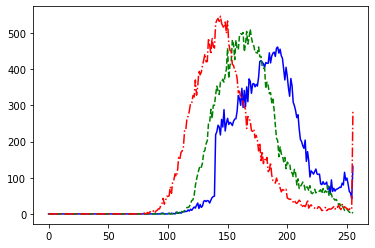

In [13]:
image_path=os.path.join('images','Dreaming_about_a_horse.jpg' )#coloured image
image=cv2.imread(image_path) 
color=['b','g','r']
for i in range(3):
    histogram=cv2.calcHist([image], channels=[i], mask=np.array(HSV_mask), histSize=[256], ranges=[0,256])
    plt.plot(histogram,color1[i])

## Histogram Equilization

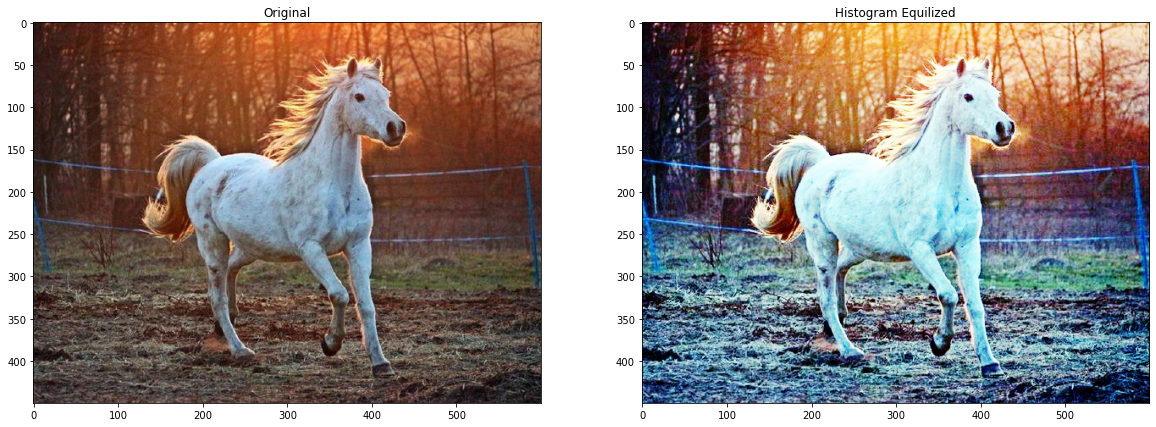

In [14]:
imageEqui=[]
for i in range(3):
    im=cv2.equalizeHist(image[:,:,i])
    imageEqui.append(im)
imageEqu=cv2.merge([imageEqui[0],imageEqui[1],imageEqui[2]])   
plt.subplots(1,2,figsize=(20,10))
plt.subplot(1,2,1)
plt.imshow(cv2.cvtColor(image,cv2.COLOR_BGR2RGB))
plt.title('Original')
plt.subplot(1,2,2)
plt.imshow(cv2.cvtColor(imageEqu,cv2.COLOR_BGR2RGB))
plt.title('Histogram Equilized')
g=1

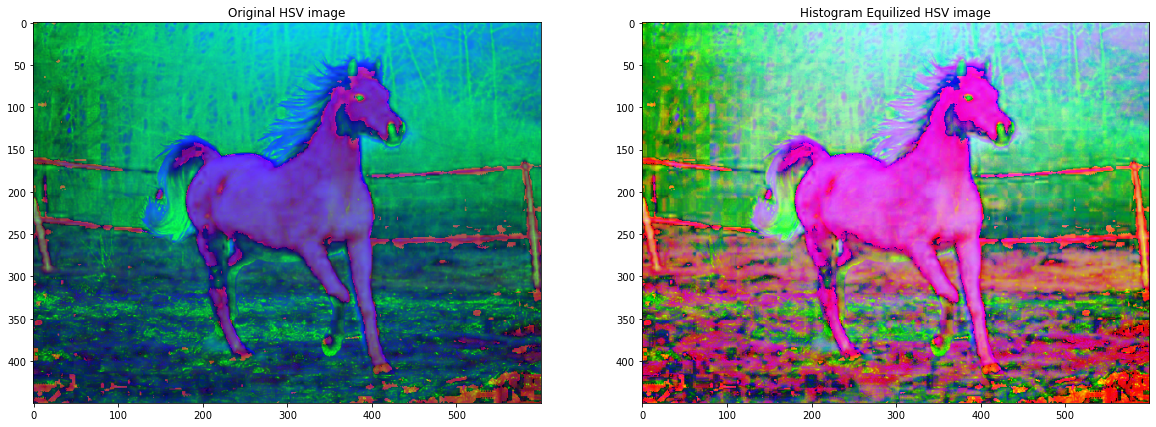

In [15]:
imageHSV=cv2.cvtColor(image,cv2.COLOR_BGR2HSV)
imageEqui=[]
for i in range(3):
    im=cv2.equalizeHist(imageHSV[:,:,i])
    imageEqui.append(im)
imageEqu=cv2.merge([imageEqui[0],imageEqui[1],imageEqui[2]])   
plt.subplots(1,2,figsize=(20,10))
plt.subplot(1,2,1)
plt.imshow(imageHSV)
plt.title('Original HSV image')
plt.subplot(1,2,2)
plt.imshow(imageEqu)
plt.title('Histogram Equilized HSV image')
g=1

In [16]:

import ipywidgets as widgets
from ipywidgets import interact, interact_manual

def HSV_equalized(image):
    imageHSV=cv2.cvtColor(image,cv2.COLOR_BGR2HSV)
    imageEqui=[]
    for i in range(3):
        im=cv2.equalizeHist(imageHSV[:,:,i])
        imageEqui.append(im)
    imageEqu=cv2.merge([imageEqui[0],imageEqui[1],imageEqui[2]])  
    return imageEqu

def display_mask(H_L,S_L,V_L,H_H,S_H,V_H):
    image_path=os.path.join('images','Dreaming_about_a_horse.jpg') #coloured image
    image=cv2.imread(image_path) 
    image=HSV_equalized(image)
    mask = cv2.inRange(image, np.array([H_L,S_L,V_L]),np.array([H_H,S_H,V_H]))
    plt.imshow(mask,cmap='gray')
    return mask
H_L=widgets.IntSlider(min=0, max=255, step=5, value=160)
S_L=widgets.IntSlider(min=0, max=255, step=5, value=0)
V_L=widgets.IntSlider(min=0, max=255, step=5, value=190)
H_H=widgets.IntSlider(min=0, max=255, step=5, value=255)
S_H=widgets.IntSlider(min=0, max=255, step=5, value=145)
V_H=widgets.IntSlider(min=0, max=255, step=5, value=255)
W=widgets.interactive(display_mask,H_L=H_L,S_L=S_L,V_L=V_L,H_H=H_H,S_H=S_H,V_H=V_H)
display(W)
HSV_mask=W.result

interactive(children=(IntSlider(value=160, description='H_L', max=255, step=5), IntSlider(value=0, description…

# <center> Thank You